# Superfície de Decisão

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

## Carregando a base de dados

In [2]:
iris = datasets.load_iris()

X = iris.data[:, :2]  # Vamos usar apenas as duas primeiras variáveis para facilitar a visualização
                     
y = iris.target

## Escolhendo o classificador
Descomente as linhas referentes ao classificador escolhido

### KNN

In [3]:
n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors, 'distance')

### Árvore

In [4]:
#clf = tree.DecisionTreeClassifier()

### Random Forest

In [5]:
#clf = RandomForestClassifier(max_depth=5, random_state=0)

### Naive Bayes

In [6]:
#clf = GaussianNB()

### Rede Neural MLP

In [7]:
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter=10000, random_state=1)

## Treinando o classificador escolhido

In [8]:
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

## Plotando o gráfico
https://deslib.readthedocs.io/en/latest/auto_examples/plot_example_P2.html

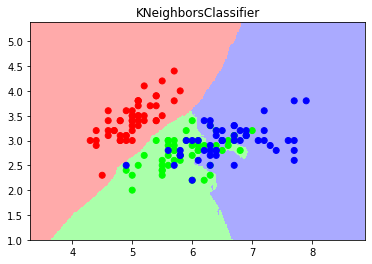

In [9]:
# Mapa de cores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(str(type(clf)).split('.')[-1].replace('\'>', ''))          

plt.show()